In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from itertools import combinations, product
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
files = [x for x in os.listdir('sensitivity_analysis/') if 'results' in x]

In [7]:
with open('sensitivity_analysis/paramgrid_sensitivity_analysis.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [8]:
all_results = []
for file in files:
    with open('sensitivity_analysis/'+file, 'rb') as f:
        result_file = pickle.load(f)
    paramset = param_grid[int(file.split('.')[0].split('_')[-1])]
    result_dict = result_file['results']
    result_dict['aind'] = paramset['aind']
    result_dict['peak_vload'] = np.log10(paramset['param'][0])
    result_dict['tim'] = paramset['param'][1]
    all_results.append(result_dict)
            
result_df = pd.DataFrame(all_results)

In [9]:
along_m = sorted(list(set(result_df['m'])))[::-1]

In [10]:
along_peak_vload = sorted(list(set(result_df['peak_vload'])))
along_aind = np.arange(20)
along_tim = sorted(list(set(result_df['tim'])))

In [11]:
all_cmap_matrices = {}
all_xticks = {}

for v in along_peak_vload:
    
    for tim in along_tim:
        
        df_subset = result_df[(result_df['peak_vload'] == v)&(result_df['tim'] == tim)]
        cmap_matrix = np.zeros((20,20))
        
        all_xticks[(v, tim)] = sorted(list(set(df_subset['ap'])))
        
        for mind in range(20):
            
            for aind in range(20):
                
                ERF_den = list(df_subset[(df_subset['m'] == along_m[mind]) & (df_subset['aind'] == along_aind[aind])]['Y_control'])[0]
                ERF_num = list(df_subset[(df_subset['m'] == along_m[mind]) & (df_subset['aind'] == along_aind[aind])]['Y_treatment'])[0]

                cmap_matrix[mind, aind] = ERF_num / ERF_den
                
        all_cmap_matrices[(v, tim)] = cmap_matrix

In [12]:
result_df

,m,n,ap,qd,ttr,Y_control,Y_treatment,b,tim,aind,peak_vload
0,1500.000000,87,9.180000,0.999997,3,2.884439e+07,3.488055e+07,9.14,3.0,0,8.0
1,1500.000000,87,8.300000,0.999997,3,2.777902e+07,3.535856e+07,8.26,3.5,0,8.0
2,1500.000000,87,10.720000,0.999997,3,3.048834e+09,3.403142e+09,10.68,3.0,0,10.0
3,10468.421053,87,10.720000,0.999997,3,3.946961e+08,1.844938e+08,10.68,3.0,0,10.0
4,10468.421053,87,11.441579,0.999997,3,3.170367e+07,3.456854e+07,10.68,3.0,3,10.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,10468.421053,87,10.597368,0.999997,3,3.443816e+06,3.798624e+06,9.91,3.0,3,9.0
5996,10468.421053,87,9.607368,0.999997,3,3.511798e+06,4.069697e+06,8.92,3.5,3,9.0
5997,10468.421053,87,8.875789,0.999997,3,3.575886e+06,4.270577e+06,8.18,4.0,3,9.0
5998,10468.421053,87,8.305789,0.999997,3,3.781295e+06,4.578739e+06,7.61,4.5,3,9.0


In [13]:
all_keys = list(all_cmap_matrices.keys())

In [14]:
all_pos = list(product(np.arange(3), np.arange(5)))

In [15]:
pos_ind = dict(zip(all_pos, all_keys))

In [16]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [17]:
mticks = [1500,5000,10000,15000,20000,25000,29900]
mticks_pos = calculate_ticks(mticks, [1500,29900], [19,0])
mticks_labels = [str(x) for x in mticks]

In [18]:
all_xticks[pos_ind[(j,i)]]

NameError: name 'j' is not defined

In [101]:
pos_ind

{(0, 0): (8.0, 3.0),
 (0, 1): (8.0, 3.5),
 (0, 2): (8.0, 4.0),
 (0, 3): (8.0, 4.5),
 (0, 4): (8.0, 5.0),
 (1, 0): (9.0, 3.0),
 (1, 1): (9.0, 3.5),
 (1, 2): (9.0, 4.0),
 (1, 3): (9.0, 4.5),
 (1, 4): (9.0, 5.0),
 (2, 0): (10.0, 3.0),
 (2, 1): (10.0, 3.5),
 (2, 2): (10.0, 4.0),
 (2, 3): (10.0, 4.5),
 (2, 4): (10.0, 5.0)}

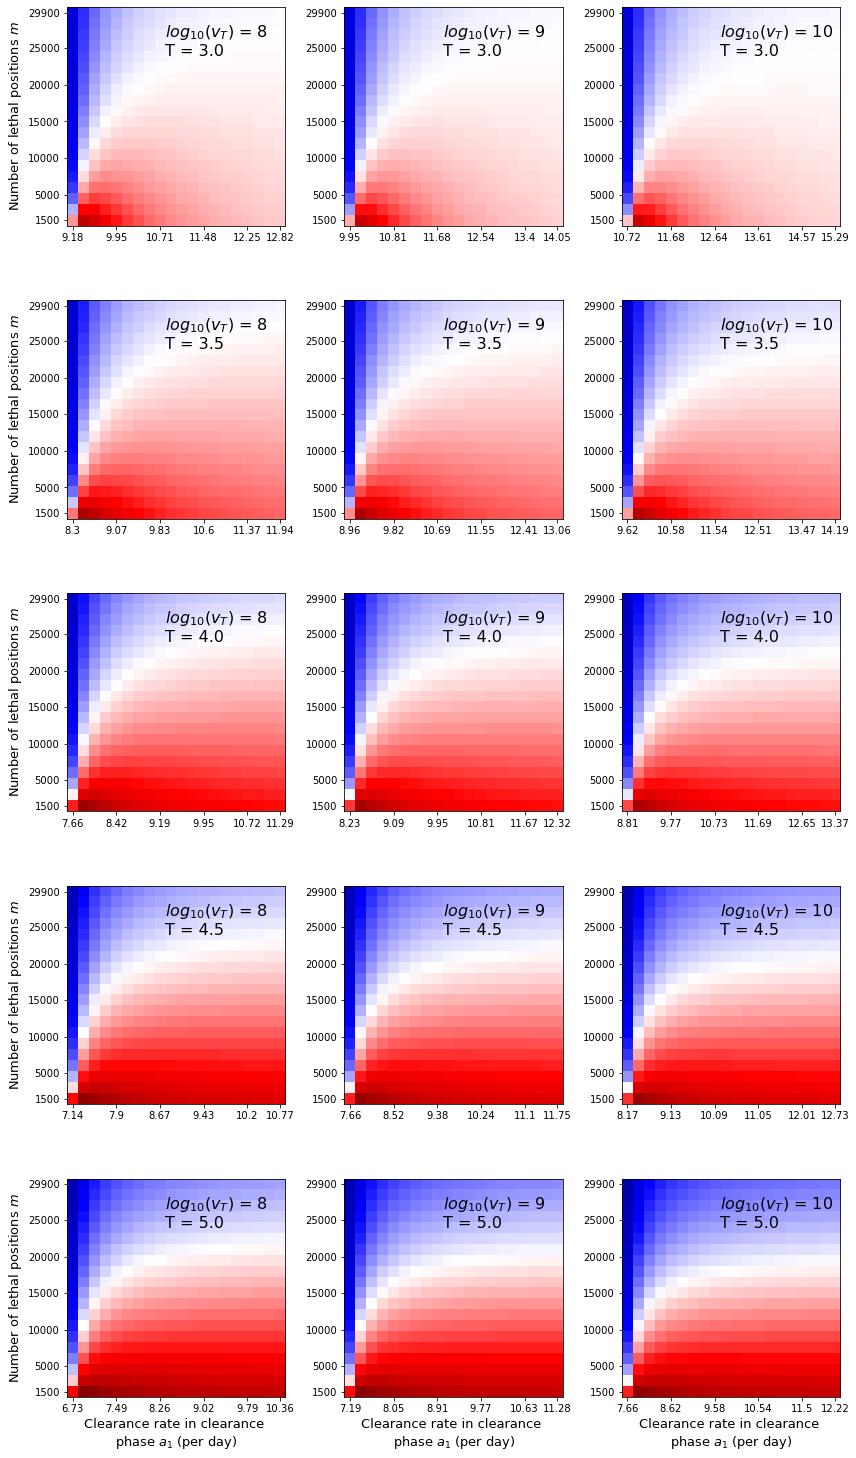

In [19]:
fig, ax = plt.subplots(5,3, figsize = (12,21))

for i in range(5):
    ax[i,0].set_ylabel('Number of lethal positions $m$', fontsize = 13)
    for j in range(3):
        ax[i,j].imshow(all_cmap_matrices[pos_ind[(j,i)]], vmin = 0, vmax = 2, cmap = 'seismic')
        ax[i,j].set_yticks(mticks_pos)
        ax[i,j].set_yticklabels(mticks_labels)
        ax[i,j].set_xticks(list(np.arange(0,20,4)) + [19])
        xtick_ls = np.array(all_xticks[pos_ind[(j,i)]])[list(np.arange(0,20,4)) + [19]]
        ax[i,j].set_xticklabels([np.round(x,2) for x in xtick_ls])
        ax[4,j].set_xlabel('Clearance rate in clearance \nphase $a_1$ (per day)', fontsize = 13)
        ax[i,j].text(8.5,4, '$log_{10}$($v_T$) = ' + str(int(pos_ind[(j,i)][0])) + '\nT = ' + str(pos_ind[(j,i)][1]), fontsize = 16)

plt.tight_layout()
plt.savefig('sensitivity_analysis_JAN25.jpg', dpi = 600, bbox_inches = 'tight')

In [21]:
all_cmap_matrices[(10.0, 3.0)]

array([[0.39373054, 0.58985069, 0.71047606, 0.78746362, 0.83884595,
        0.87452872, 0.90015513, 0.91908619, 0.93340892, 0.94446796,
        0.95315808, 0.96009161, 0.96569809, 0.97028537, 0.97407842,
        0.97724442, 0.97990956, 0.98217036, 0.98410164, 0.985762  ],
       [0.3948263 , 0.59975446, 0.7231864 , 0.80051553, 0.85130843,
        0.88609067, 0.91075667, 0.92876735, 0.94224577, 0.95254533,
        0.96055815, 0.96688952, 0.97196071, 0.97607143, 0.97943919,
        0.98222457, 0.98454801, 0.9865011 , 0.9881544 , 0.98956287],
       [0.39622603, 0.61079977, 0.73709843, 0.81462445, 0.86465709,
        0.8983876 , 0.92196917, 0.93896002, 0.95151464, 0.96099092,
        0.96827482, 0.97396192, 0.97846313, 0.98206847, 0.98498679,
        0.98737115, 0.98933554, 0.99096605, 0.99232854, 0.99347398],
       [0.39798246, 0.62315916, 0.75236485, 0.82990556, 0.87897638,
        0.91148175, 0.93383924, 0.94969973, 0.9612431 , 0.96982647,
        0.97632552, 0.98132296, 0.985217  , 0

In [20]:
all_cmap_matrices[(8.0, 3.0)]

array([[0.40121947, 0.59024852, 0.71084777, 0.78960748, 0.84285156,
        0.88003996, 0.90676433, 0.92644332, 0.94124013, 0.95256758,
        0.96137496, 0.96831626, 0.97385218, 0.97831372, 0.98194288,
        0.98491944, 0.98737882, 0.98942439, 0.9911359 , 0.99257559],
       [0.4027737 , 0.60038572, 0.72406264, 0.80340954, 0.85620771,
        0.89255795, 0.91833226, 0.93707066, 0.95098624, 0.96150906,
        0.96959079, 0.97588135, 0.98083483, 0.98477495, 0.98793671,
        0.9904934 , 0.99257471, 0.99427891, 0.99568137, 0.9968405 ],
       [0.40468397, 0.61170059, 0.73855379, 0.81836381, 0.87054914,
        0.90590533, 0.93059738, 0.9482867 , 0.96123282, 0.97087925,
        0.9781767 , 0.98376828, 0.98809931, 0.99148462, 0.99415084,
        0.99626384, 0.99794671, 0.99929207, 1.00037037, 1.0012358 ],
       [0.40701155, 0.62437239, 0.75448682, 0.83459972, 0.88597331,
        0.92015537, 0.94361539, 0.96013438, 0.97201352, 0.98070489,
        0.98715422, 0.99199459, 0.99566012, 0